# 扬声器交叉滤波器
这个例子展示了如何设计一个简单的数字三向扬声器模型.该系统将音频输入分为低频、中频段和高频，分别对应于低音炮、中程驱动器和高音器。划分带的标准化交叉频率的典型值是0.136πRAD/样本和0.317πRAD/样本。
创建低通、带通和高通滤波器以产生低频、中频和高频频带.指定频率。
为每个过滤器使用6阶Chebyshev I型设计。指定一个1dB的通带波纹，大于实际扬声器的值。这个cheby1功能使带通设计的顺序加倍。通过将带通滤波器的顺序减半，使所有滤波器具有相同的顺序。返回每个滤波器的零点、极点和增益。

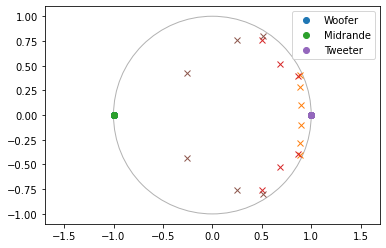

In [1]:
import matplotlib.pyplot as plt
from scipy.signal import cheby1
ord=6
rip=1
lo=0.136
hi=0.317
z1,p1,k1=cheby1(ord,rip,lo,'low',analog=False,output='zpk')
z2,p2,k2=cheby1(ord/2,rip,[lo,hi],'bandpass',output='zpk')
z3,p3,k3=cheby1(ord,rip,hi,'highpass',output='zpk')


plt.plot(z1.real,z1.imag,'o',label='Woofer')
plt.plot(p1.real,p1.imag,'x')
plt.plot(z2.real,z2.imag,'o',label='Midrande')
plt.plot(p2.real,p2.imag,'x')
plt.plot(z3.real,z3.imag,'o',label='Tweeter')
plt.plot(p3.real,p3.imag,'x')

plt.gca().add_patch(plt.Circle((0,0), radius=1, fill=False, alpha=.3))
plt.axis('equal')
plt.legend()
plt.show()


低音炮：零z=−1抑制高频。电线杆增强了之间的震级响应。0以及较低的交叉频率。
中程：零z=0和z=1抑制高低频率。极点增强了较低和较高交叉频率之间的幅值响应。
推特：零z=1抑制低频。极点增强了更高的交叉频率和更高的交叉频率之间的幅值响应。π.
绘制单位圆上的震级响应图，以查看不同极点和零点的影响。使用线性单元。将过滤器表示为二阶部分。

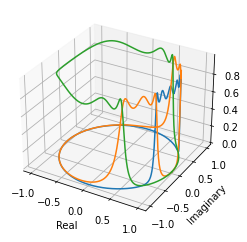

In [3]:
from scipy.signal import cheby1,sosfreqz
import numpy as np
sw=cheby1(ord,rip,lo,'low',analog=False,output='sos')
sm=cheby1(ord/2,rip,[lo,hi],'bandpass',output='sos')
st=cheby1(ord,rip,hi,'highpass',output='sos')

nf=1024
fw,hw=sosfreqz(sw,nf,whole=True)
fm,hm=sosfreqz(sm,nf,whole=True)
ft,ht=sosfreqz(st,nf,whole=True)

fig,ax=plt.subplots(subplot_kw=dict(projection='3d'))
plt.plot(np.cos(fw),np.sin(fw),abs(hw))
plt.plot(np.cos(fw),np.sin(fw),abs(hm))
plt.plot(np.cos(fw),np.sin(fw),abs(ht))
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

In [ ]:
绘制以分贝为单位的震级响应.

D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


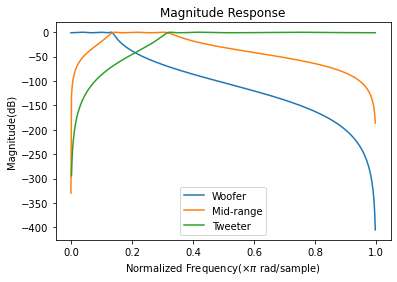

In [5]:
from scipy.signal import freqz
b1,a1=cheby1(ord,rip,lo,'low',analog=False,output='ba')
b2,a2=cheby1(ord/2,rip,[lo,hi],'bandpass',output='ba')
b3,a3=cheby1(ord,rip,hi,'highpass',analog=False,output='ba')
w1,h1=freqz(b1,a1)
w2,h2=freqz(b2,a2)
w3,h3=freqz(b3,a3)

plt.plot(w1/np.pi,20*np.log10(h1),label='Woofer')
plt.plot(w2/np.pi,20*np.log10(h2),label='Mid-range')
plt.plot(w3/np.pi,20*np.log10(h3),label='Tweeter')
plt.legend()
plt.ylabel('Magnitude(dB)')
plt.xlabel('Normalized Frequency(×$\pi$ rad/sample)')
plt.title('Magnitude Response')
plt.show()

加载一个音频文件，其中包含汉德尔的“哈利路亚合唱团”的片段，采样频率为8192赫兹。通过滤波将信号分成三个频带并画出。

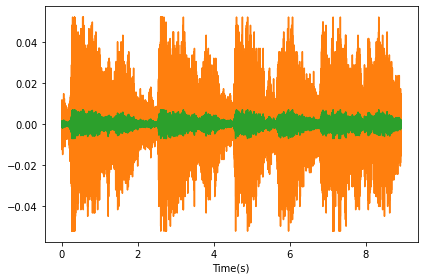

In [8]:
from scipy.io import loadmat
from scipy.signal import sosfilt
m=loadmat("handle.mat")
Y=m['y']
Fs=8192
yw=sosfilt(sw,Y)
ym=sosfilt(sm,Y)
yt=sosfilt(st,Y)

plt.plot(np.arange(0,len(Y)/Fs,1/Fs),yw)
plt.plot(np.arange(0,len(Y)/Fs,1/Fs),yt)
plt.plot(np.arange(0,len(Y)/Fs,1/Fs),ym)
plt.xlabel('Time(s)')
plt.tight_layout()
plt.show()